In [1]:
import numpy as np
from copy import copy

import matplotlib.pyplot as plt
%matplotlib inline

Quicker and easier than the other two methods.

# Part 1

In [2]:
test = np.array(['0,9 -> 5,9',
                 '8,0 -> 0,8',
                 '9,4 -> 3,4',
                 '2,2 -> 2,1',
                 '7,0 -> 7,4',
                 '6,4 -> 2,0',
                 '0,9 -> 2,9',
                 '3,4 -> 1,4',
                 '0,0 -> 8,8',
                 '5,5 -> 8,2'])

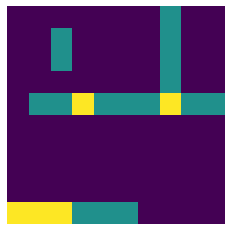

5


In [3]:
def get_lines(data):
    #Convert input into line start/end coordinates
    lines = []
    for line in data:
        p_s, q_s = line.split(' -> ')
        p_s = p_s.split(',')
        p_s = np.array(p_s).astype(int)
        q_s = q_s.split(',')
        q_s = np.array(q_s).astype(int)
        lines.append([p_s, q_s])
    lines = np.array(lines)
    return lines

def keep_horizontal_verticle(lines):
    #Only keep horizontal orverticle lines
    delete = []
    for i in range(0, len(lines)):
        if lines[i][0,0] != lines[i][1,0] and lines[i][0,1] != lines[i][1,1]:
            delete.append(i)
    lines = np.delete(lines, delete, 0)
    return lines

def generate_line(line):
    #Create coordinates for line
    dxdy = np.array([0,0])
    if line[0,0] == line[1,0]:
        #verticle line
        dxdy[1] += 1
    elif line[0,1] == line[1,1]:
        #horizontal line
        dxdy[0] += 1
    else:
        #diagonal line
        dxdy[0] += 1
        dxdy[1] += 1
        
    #check the direction we need to go
    if line[0,0] > line[1,0]:
        dxdy[0] *= -1
    if line[0,1] > line[1,1]:
        dxdy[1] *= -1
        
    #calculate line coordinates
    line_positions = [copy(line[0])]
    while True:
        line[0] += dxdy
        line_positions.append(copy(line[0]))
        if line[0,0] == line[1,0] and line[0,1] == line[1,1]:
            break
    return np.array(line_positions)

def generate_map(lines):
    size = np.max(lines)+1
    floor_map = np.zeros((size,size), int)
    
    #For each line, increment floor_map by 1
    for line in lines:
        line = generate_line(line)
        floor_map[line[:,0],line[:,1]] += 1
        
    return floor_map

def count_intersections(data, xy=True):
    lines = get_lines(data)
    if xy:
        lines = keep_horizontal_verticle(lines)
    floor_map = generate_map(lines)
    
    plt.imshow(floor_map.T)
    plt.axis('off')
    plt.show()
    
    #Intersections are where floor_map is > 1
    vent = np.where(floor_map > 1)
    return len(vent[0])

print(count_intersections(test))

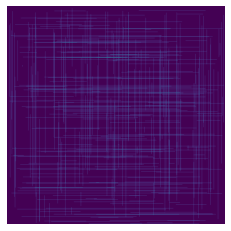

Part 1 Result: 7438


In [4]:
inpt = np.genfromtxt('day5_input.txt', dtype=str, delimiter='\n')
print('Part 1 Result:', count_intersections(inpt))

# Part 2

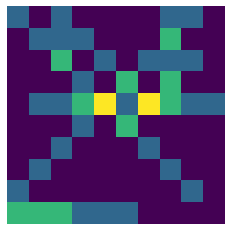

12


In [5]:
print(count_intersections(test, False))

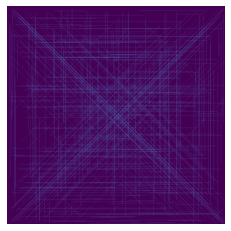

Part 2 Result: 21406


In [6]:
print('Part 2 Result:', count_intersections(inpt, False))